In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
nex = pd.read_csv('./Data/NEX_subset_prices.csv', index_col='Date')
nex = nex.fillna(0)

In [3]:
C = nex.shape[1]
W = (nex > 0).astype(int).sum(axis=1) / C

nex = (nex.T * W).T.sum(axis=1)

In [4]:
nex.index = pd.to_datetime(nex.index)

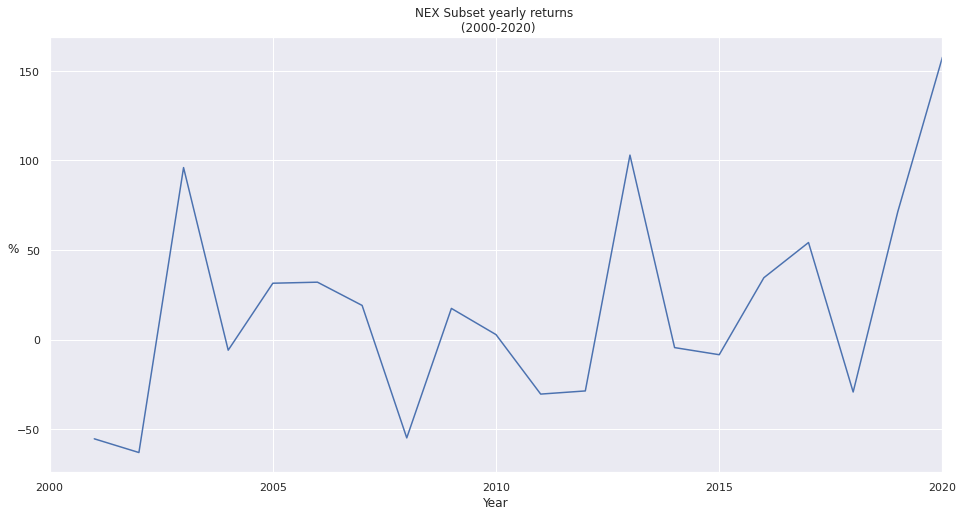

In [5]:
nex_subset_returns = nex.resample('Y').ffill().pct_change() * 100
# nex_subset_returns = np.cumprod(1 + nex_subset_returns) * 100

plt.figure(figsize=(16,8))
title = 'NEX Subset yearly returns \n (2000-2020)'
h = nex_subset_returns.plot()
h.set_title(title)
h.set_xlabel('Year')
h.set_ylabel('%', rotation=0)
h.get_figure().savefig(f'./Plots/{title}')

Text(0, 0.5, '%')

<Figure size 1152x576 with 0 Axes>

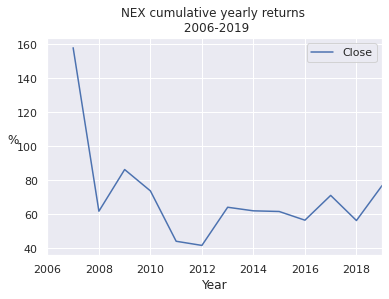

In [6]:
nex_full = pd.read_excel('./Data/NEX_full_prices.xlsx')
nex_full.index = nex_full['Date']
nex_full = nex_full.drop('Date', axis=1)

nex_full_returns = nex_full.resample('Y').ffill().pct_change()
nex_full_returns = np.cumprod(1 + nex_full_returns) * 100

plt.figure(figsize=(16,8))
h = nex_full_returns.plot()
h.set_title('NEX cumulative yearly returns \n 2006-2019')
h.set_xlabel('Year')
h.set_ylabel('%', rotation=0)